In [ ]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import tensorflow as tf

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

1. **`import numpy as np`**  
   - Provides tools for numerical operations, including array and matrix manipulation.  

2. **`import matplotlib.pyplot as plt`**  
   - Used for creating visualizations like plots and charts.  

3. **`import matplotlib.gridspec as gridspec`**  
   - Offers advanced layout control for subplots.  

4. **`import tensorflow as tf`**  
   - A library for building and training machine learning models.  

5. **`import ssl` and `ssl._create_default_https_context = ssl._create_unverified_context`**  
   - Resolves SSL certificate issues for secure data downloads.  

These imports set up the tools needed for data handling, visualization, and machine learning tasks.

In [2]:
cifar = tf.keras.datasets.cifar10
# loading the data set
(X_train, y_train), (X_test, y_test) = cifar.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


#### **1. Load the CIFAR-10 Dataset**
```python
cifar = tf.keras.datasets.cifar10
```
- **Purpose**:  
   Assigns the CIFAR-10 dataset to the variable `cifar`.  
- **Details**:  
   CIFAR-10 is a built-in TensorFlow dataset containing 60,000 32x32 color images across 10 classes.  

---

#### **2. Split the Dataset into Training and Testing Sets**
```python
(X_train, y_train), (X_test, y_test) = cifar.load_data()
```
- **Purpose**:  
   Loads the CIFAR-10 dataset and splits it into training and testing subsets.  
- **Details**:  
   - **Training Data**:  
      - `X_train`: 50,000 images used for training the model.  
      - `y_train`: Labels corresponding to the training images (e.g., `0` for "airplane").  
   - **Testing Data**:  
      - `X_test`: 10,000 images used for testing model performance.  
      - `y_test`: Labels corresponding to the testing images.  
   - The data structure:  
      - `X_train` and `X_test`: 4D NumPy arrays with dimensions `(number of images, height, width, channels)`.  
      - `y_train` and `y_test`: 1D NumPy arrays containing integer labels for the respective images.  


In [3]:
# image variables for sizing
img_size = 32
img_chan = 3
n_classes = 10

# Reshaping the training data 
X_train = np.reshape(X_train, [-1, img_size, img_size, img_chan])
X_train = X_train.astype(np.float32) / 255

# Reshaping the testing data
X_test = np.reshape(X_test, [-1, img_size, img_size, img_chan])
X_test = X_test.astype(np.float32) / 255

# converting the labels to categorical values
to_categorical = tf.keras.utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


This code section preprocesses the CIFAR-10 dataset to prepare it for input into a neural network. It includes defining image properties, reshaping data, normalizing pixel values, and converting labels into a suitable format.

---

#### **1. Define Image Variables**
```python
img_size = 32
img_chan = 3
n_classes = 10
```
- **`img_size`**: Sets the height and width of each image (32x32 pixels).  
- **`img_chan`**: Represents the number of color channels (3 for RGB).  
- **`n_classes`**: Specifies the number of output classes in the dataset (CIFAR-10 has 10 classes).

---

#### **2. Reshape and Normalize Training Data**
```python
X_train = np.reshape(X_train, [-1, img_size, img_size, img_chan])
X_train = X_train.astype(np.float32) / 255
```
- **Reshaping**: Converts the data into a 4D array of shape `(number of images, height, width, color channels)` for compatibility with the model.  
- **Normalization**: Scales pixel values to the range `[0, 1]` by dividing by `255`, improving training efficiency and model performance.

---

#### **3. Reshape and Normalize Testing Data**
```python
X_test = np.reshape(X_test, [-1, img_size, img_size, img_chan])
X_test = X_test.astype(np.float32) / 255
```
- The testing data undergoes the same reshaping and normalization to ensure consistency with the training data.

---

#### **4. Convert Labels to Categorical Values**
```python
to_categorical = tf.keras.utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
```
- **Purpose**: Converts integer labels (e.g., `0` for "airplane") into one-hot encoded vectors (e.g., `[1, 0, 0, ..., 0]` for class 0).  
- **Why?**: Neural networks for classification require outputs in a one-hot encoded format to match the structure of the prediction layer.


In [4]:
tf.random.set_seed(0)
# Tensorflow Keras Model with 2 Convolution Layers and Max Pooling
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding = 'same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

/Users/wentaozhang/anaconda3/envs/python310/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4268 - loss: 1.5955 - val_accuracy: 0.6057 - val_loss: 1.1213
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6335 - loss: 1.0371 - val_accuracy: 0.6477 - val_loss: 0.9919
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6964 - loss: 0.8697 - val_accuracy: 0.6718 - val_loss: 0.9618
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7360 - loss: 0.7558 - val_accuracy: 0.6729 - val_loss: 0.9847
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7722 - loss: 0.6554 - val_accuracy: 0.6845 - val_loss: 0.9705


This code section defines, compiles, and trains a convolutional neural network (CNN) using TensorFlow and Keras.

#### **1. Set Random Seed**
```python
tf.random.set_seed(0)
```
- **Purpose**:  
   Ensures reproducibility of results by fixing the random number generator seed.  
- **Details**:  
   TensorFlow operations involving randomness (e.g., weight initialization) will produce the same results every time the code runs.

---

#### **2. Define the CNN Model**
```python
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
```
- **Purpose**:  
   Creates a CNN using the `Sequential` API, which stacks layers sequentially.  
- **Details of Each Layer**:  
   1. **`Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3))`**  
      - Extracts features using 32 filters of size 3x3.  
      - Applies ReLU activation to introduce non-linearity.  
      - `padding='same'` ensures the output size matches the input size.  
      - `input_shape=(32,32,3)` specifies the input image dimensions.  
   2. **`MaxPooling2D((2, 2))`**  
      - Reduces the spatial dimensions by 2x2 pooling, keeping the most important features.  
   3. **`Conv2D(64, (3, 3), activation='relu', padding='same')`**  
      - Adds a deeper convolutional layer with 64 filters for higher-level feature extraction.  
   4. **`MaxPooling2D((2, 2))`**  
      - Further reduces the spatial dimensions.  
   5. **`Flatten()`**  
      - Converts the 2D feature maps into a 1D vector for input into dense layers.  
   6. **`Dense(128, activation='relu')`**  
      - Fully connected layer with 128 neurons and ReLU activation to learn complex patterns.  
   7. **`Dense(10, activation='softmax')`**  
      - Output layer with 10 neurons (one for each class) and softmax activation for probabilistic classification.

---

#### **3. Compile the Model**
```python
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```
- **Purpose**:  
   Configures the model for training.  
- **Details**:  
   - **`optimizer='adam'`**: Uses the Adam optimizer, a popular choice for training neural networks.  
   - **`loss='categorical_crossentropy'`**: Appropriate for multi-class classification with one-hot encoded labels.  
   - **`metrics=['accuracy']`**: Tracks accuracy during training and evaluation.

---

#### **4. Train the Model**
```python
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
```
- **Purpose**:  
   Trains the CNN on the dataset.  
- **Details**:  
   - **`X_train, y_train`**: Training data (images and one-hot encoded labels).  
   - **`epochs=5`**: Number of iterations through the entire training dataset.  
   - **`batch_size=32`**: Processes 32 samples at a time for efficiency.  
   - **`validation_data=(X_test, y_test)`**: Evaluates model performance on the test dataset during training.


In [5]:
# Creating images from test set

# List of class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def create_img(i, test = True):
    '''
    Creates an png of the ith picture in the data set

    i: integer
        - index of the picture
    test: logical
        - if True then creates them from the test set
        - if False then creates them from the training set
    '''
    if test:
        # index of true label
        index_true = np.where(y_test[i] == 1)[0][0]

        # Predict the class probabilities
        single_image = X_test[i:i+1]  # Add batch dimension (1, 32, 32, 3)
        single_prediction = model.predict(single_image)
        # index of predicted label
        index_predicted = tf.argmax(single_prediction[0])

        plt.imshow(X_test[i])
        plt.title(f"Label: {class_labels[index_true]}, Predicted Class: {class_labels[index_predicted]}")
        plt.axis('off')  # Hide the axis

        plt.savefig(f'plot_test_img{i}.png')
    else:
        # index of true label
        index_true = np.where(y_train[i] == 1)[0][0]

        # Predict the class probabilities
        single_image = X_train[i:i+1]  # Add batch dimension (1, 32, 32, 3)
        single_prediction = model.predict(single_image)
        # index of predicted label
        index_predicted = tf.argmax(single_prediction[0])

        plt.imshow(X_train[i])
        plt.title(f"Label: {class_labels[index_true]}, Predicted Class: {class_labels[index_predicted]}")
        plt.axis('off')  # Hide the axis

        plt.savefig(f'plot_train_img{i}.png')

This code section defines a function to visualize images from the CIFAR-10 dataset, including their true and predicted labels. It processes images from either the test or training dataset, uses the trained model to make predictions, and saves the visualizations as PNG files.

---

#### **1. List of Class Labels**
```python
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
```
- **Purpose**:  
   Provides human-readable class names corresponding to the integer labels used in the CIFAR-10 dataset.
- **Details**:  
   - CIFAR-10 assigns integers 0–9 as labels for each class.
   - This list allows mapping these integers to descriptive class names for visualization and interpretation (e.g., `0 -> airplane`, `1 -> automobile`, etc.).

---

#### **2. Define the Function**
```python
def create_img(i, test=True):
    '''
    Creates a PNG image of the ith picture in the dataset.

    Parameters:
    - i: Integer index of the image to visualize.
    - test: Boolean flag to determine if the image is from the test set (`True`) or training set (`False`).
    '''
```
- **Purpose**:  
   Defines a reusable function to process and visualize individual images from the dataset.
- **Parameters**:  
   - **`i`**: Specifies the index of the image to be processed.  
   - **`test`**: Determines whether to select images from the test dataset (`True`) or training dataset (`False`).

---

#### **3. Visualize Images from the Test Set**
```python
if test:
    # index of true label
    index_true = np.where(y_test[i] == 1)[0][0]

    # Predict the class probabilities
    single_image = X_test[i:i+1]  # Add batch dimension (1, 32, 32, 3)
    single_prediction = model.predict(single_image)
    # index of predicted label
    index_predicted = tf.argmax(single_prediction[0])

    plt.imshow(X_test[i])
    plt.title(f"Label: {class_labels[index_true]}, Predicted Class: {class_labels[index_predicted]}")
    plt.axis('off')  # Hide the axis

    plt.savefig(f'plot_test_img{i}.png')
```
- **Purpose**:  
   Visualizes and saves an image from the test set with the true label and the predicted label.
- **Details**:  
   - **True Label**:  
      - The true label is extracted from the one-hot encoded `y_test` array using `np.where(y_test[i] == 1)`.  
      - Example: If the label is `[0, 0, 1, 0, ..., 0]`, the true class is the index `2`.  
   - **Prediction**:  
      - The trained model predicts class probabilities for the selected image.
      - The predicted class is the index of the maximum probability, obtained using `tf.argmax(single_prediction[0])`.
   - **Visualization**:  
      - `plt.imshow()` displays the image.
      - The title contains both the true and predicted class names.
      - `plt.axis('off')` removes the axes for a cleaner visualization.
   - **Saving the Image**:  
      - The image is saved as a PNG file with a name like `plot_test_img{i}.png`.

---

#### **4. Visualize Images from the Training Set**
```python
else:
    # index of true label
    index_true = np.where(y_train[i] == 1)[0][0]

    # Predict the class probabilities
    single_image = X_train[i:i+1]  # Add batch dimension (1, 32, 32, 3)
    single_prediction = model.predict(single_image)
    # index of predicted label
    index_predicted = tf.argmax(single_prediction[0])

    plt.imshow(X_train[i])
    plt.title(f"Label: {class_labels[index_true]}, Predicted Class: {class_labels[index_predicted]}")
    plt.axis('off')  # Hide the axis

    plt.savefig(f'plot_train_img{i}.png')
```
- **Purpose**:  
   Similar to the test set visualization but processes and saves images from the training set.
- **Details**:  
   - The same process is applied to extract true labels, predict classes, visualize the image, and save it.  
   - The only difference is that the training set arrays `X_train` and `y_train` are used instead of `X_test` and `y_test`.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


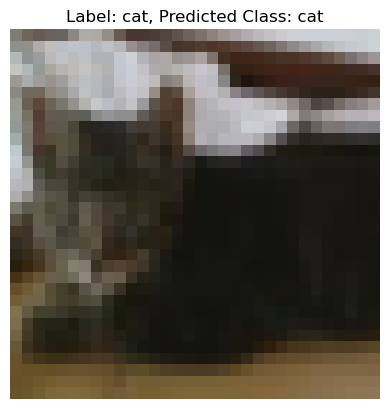

In [6]:
for i in range(10):
    create_img(i)
for i in range(10):
    create_img(i, test = False)

This code uses the previously defined `create_img` function to visualize and save images from both the test and training datasets. It processes the first 10 images from each dataset, generating labeled visualizations.

---

#### **1. Visualize Test Set Images**
```python
for i in range(10):
    create_img(i)
```
- **Purpose**:  
   Iterates through the first 10 images in the **test dataset** and creates labeled visualizations.
- **Details**:
   - **`range(10)`**: Generates numbers from 0 to 9, corresponding to the indices of the first 10 images in the test set.  
   - **`create_img(i)`**: Calls the `create_img` function with `test=True` (default).  
     - The function retrieves the image at index `i` from the test set, predicts its class using the trained model, and generates a visualization with the true and predicted labels.  
     - The visualizations are saved as PNG files named `plot_test_img0.png`, `plot_test_img1.png`, ..., `plot_test_img9.png`.

---

#### **2. Visualize Training Set Images**
```python
for i in range(10):
    create_img(i, test=False)
```
- **Purpose**:  
   Iterates through the first 10 images in the **training dataset** and creates labeled visualizations.
- **Details**:
   - **`range(10)`**: Generates numbers from 0 to 9, corresponding to the indices of the first 10 images in the training set.  
   - **`create_img(i, test=False)`**: Calls the `create_img` function with `test=False`.  
     - The function retrieves the image at index `i` from the training set, predicts its class using the trained model, and generates a visualization with the true and predicted labels.  
     - The visualizations are saved as PNG files named `plot_train_img0.png`, `plot_train_img1.png`, ..., `plot_train_img9.png`.



In [7]:
def fgsm_attack(image, label, model, epsilon):
    """
    Generates adversarial examples using FGSM.
    
    image: tf.Tensor
        Input image to perturb, shape (1, 32, 32, 3).
    label: tf.Tensor
        True label of the image, shape (1, 10).
    model: tf.keras.Model
        The trained model.
    epsilon: float
        The strength of the perturbation.
    """
    
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    label = tf.convert_to_tensor(label, dtype=tf.float32)
    
    # Ensure the image has a gradient
    with tf.GradientTape() as tape:
        tape.watch(image)  # Watch the input image
        prediction = model(image)  # Get model predictions
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)  # Compute loss

    # Calculate gradients of loss w.r.t. the image
    gradient = tape.gradient(loss, image)
    signed_grad = tf.sign(gradient)  # Get sign of gradients

    # Generate the adversarial example
    adv_image = image + epsilon * signed_grad
    adv_image = tf.clip_by_value(adv_image, 0, 1)  # Keep the pixel values in [0, 1]
    return adv_image


This function implements the **Fast Gradient Sign Method (FGSM)** to generate adversarial examples by perturbing an input image. FGSM is a simple yet effective attack technique used to deceive machine learning models, particularly neural networks.

---

#### **1. Function Definition and Parameters**
```python
def fgsm_attack(image, label, model, epsilon):
    """
    Generates adversarial examples using FGSM.
    
    Parameters:
    - image: tf.Tensor
        The input image to perturb, with shape (1, 32, 32, 3).
    - label: tf.Tensor
        The true label of the image, one-hot encoded, with shape (1, 10).
    - model: tf.keras.Model
        The trained neural network model to attack.
    - epsilon: float
        The strength of the perturbation, controlling how much the input is altered.
    """
```
- **Purpose**:  
   Creates adversarial examples by adding noise to an image in a way that maximizes the model’s classification error.  
- **Parameters**:  
   - **`image`**: The input image to be perturbed (batched with a batch size of 1).  
   - **`label`**: The true label of the image, one-hot encoded to calculate the loss.  
   - **`model`**: The trained model that is being attacked.  
   - **`epsilon`**: A small value that determines the magnitude of the perturbation.

---

#### **2. Convert Inputs to Tensors**
```python
image = tf.convert_to_tensor(image, dtype=tf.float32)
label = tf.convert_to_tensor(label, dtype=tf.float32)
```
- **Purpose**:  
   Ensures that the `image` and `label` inputs are TensorFlow tensors of type `float32`, which is required for gradient computations.

---

#### **3. Compute the Loss with Respect to the Input Image**
```python
with tf.GradientTape() as tape:
    tape.watch(image)  # Ensure the gradient is computed for the input image
    prediction = model(image)  # Get predictions from the model
    loss = tf.keras.losses.categorical_crossentropy(label, prediction)  # Compute the loss
```
- **Purpose**:  
   Calculates the loss of the model with respect to the input image to determine how the image affects the model’s prediction.
- **Details**:  
   - **`tf.GradientTape`**: Tracks operations for automatic differentiation, enabling the calculation of gradients with respect to `image`.
   - **`tape.watch(image)`**: Ensures gradients are computed for `image`, which is not watched by default.
   - **`loss`**: The categorical cross-entropy between the true label (`label`) and the model's predicted probabilities (`prediction`).

---

#### **4. Compute the Gradient of the Loss with Respect to the Image**
```python
gradient = tape.gradient(loss, image)  # Calculate the gradient of the loss w.r.t. the image
signed_grad = tf.sign(gradient)  # Get the sign of the gradient
```
- **Purpose**:  
   Determines how the loss changes with respect to changes in the pixel values of the input image.
- **Details**:  
   - **`gradient`**: Measures the direction and magnitude of the change in loss for each pixel in the image.
   - **`tf.sign(gradient)`**: Converts the gradient into a sign matrix (`+1` for positive gradients, `-1` for negative gradients, `0` for zero).

---

#### **5. Generate the Adversarial Image**
```python
adv_image = image + epsilon * signed_grad  # Add perturbation to the image
adv_image = tf.clip_by_value(adv_image, 0, 1)  # Clip pixel values to [0, 1]
```
- **Purpose**:  
   Perturbs the input image in the direction of the gradient to maximize the loss and deceive the model.
- **Details**:  
   - **Perturbation**: Adds a scaled version of the signed gradient (`epsilon * signed_grad`) to the input image.  
   - **`tf.clip_by_value`**: Ensures that the pixel values remain valid by clipping them to the range `[0, 1]`.

---

#### **6. Return the Adversarial Image**
```python
return adv_image
```
- **Purpose**:  
   Returns the adversarial example, which looks visually similar to the original image but is crafted to mislead the model.

---

### **Step-by-Step Process**
1. **Input**:  
   Provide an image, its true label, the trained model, and a small perturbation strength (`epsilon`).  
2. **Compute Loss**:  
   Calculate how well the model classifies the image and measure the loss between the true label and predicted probabilities.  
3. **Compute Gradients**:  
   Determine how changes in the pixel values affect the loss.  
4. **Perturb Image**:  
   Modify the image in the direction of the gradient to increase the loss.  
5. **Clip Values**:  
   Ensure the perturbed image’s pixel values remain within a valid range.  
6. **Output**:  
   Return the adversarial example, which may fool the model into making an incorrect prediction.

---

### **Purpose of FGSM**
The **Fast Gradient Sign Method (FGSM)** is used to evaluate the robustness of machine learning models by creating adversarial examples. These examples are crafted to exploit the model's vulnerabilities, highlighting potential weaknesses in the model's decision boundaries.

This function is a key tool in adversarial machine learning, providing insights into how models can be attacked and defended.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


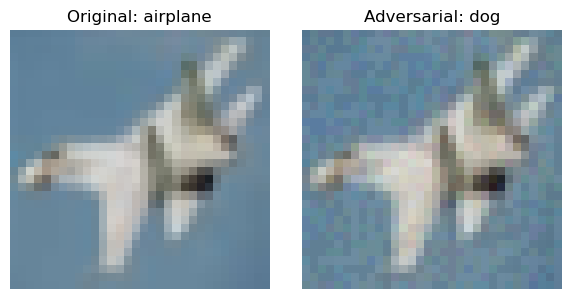

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


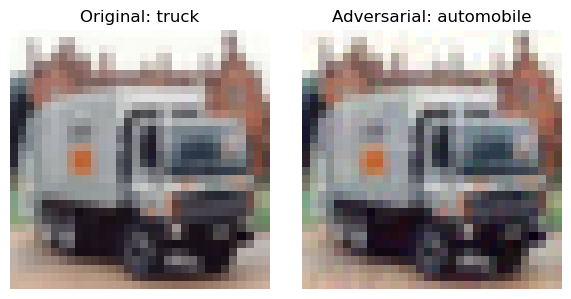

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


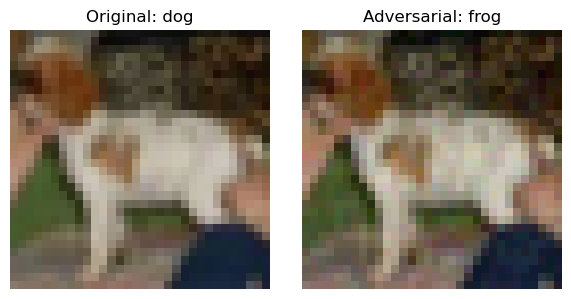

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


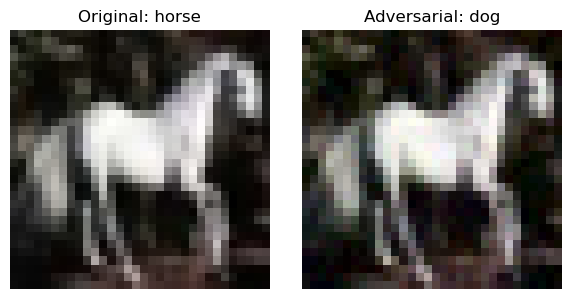

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


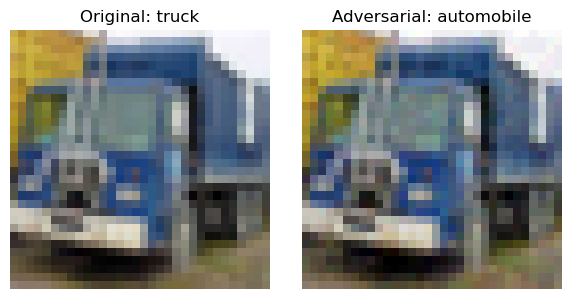

In [8]:
def test_fgsm_attack(num, epsilon):
    """
    Tests FGSM attack on a batch of images and visualizes the results.
    
    epsilon: float
        Strength of the FGSM attack.
    """
    for i in range(num,num+5):  # Visualize 5 examples
        image = X_test[i:i+1]  # Select one image (add batch dimension)
        label = y_test[i:i+1]  # True label of the image

        # Generate adversarial example
        adv_image = fgsm_attack(image, label, model, epsilon)

        # Get predictions for both clean and adversarial images
        clean_pred = model.predict(image)
        adv_pred = model.predict(adv_image)

        clean_class = class_labels[np.argmax(clean_pred)]
        adv_class = class_labels[np.argmax(adv_pred)]

        # Plot the results
        plt.figure(figsize=(6, 3))

        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(image[0])
        plt.title(f"Original: {clean_class}")
        plt.axis('off')

        # Adversarial image
        plt.subplot(1, 2, 2)
        plt.imshow(adv_image[0])
        plt.title(f"Adversarial: {adv_class}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()
        

test_fgsm_attack(10, 0.02)

This code tests the **FGSM attack** on a batch of images from the test dataset. It generates adversarial examples, visualizes the original and perturbed images, and compares the model’s predictions for each.

---

#### **1. Function Definition and Parameters**
```python
def test_fgsm_attack(num, epsilon):
    """
    Tests FGSM attack on a batch of images and visualizes the results.
    
    Parameters:
    - num: int
        Starting index of the images in the test set.
    - epsilon: float
        Strength of the FGSM perturbation.
    """
```
- **Purpose**:  
   Runs the FGSM attack on a small batch of images from the test dataset and displays the results.  
- **Parameters**:  
   - **`num`**: Specifies the starting index for selecting images from the test dataset.  
   - **`epsilon`**: Determines the magnitude of the FGSM attack, controlling the strength of the perturbation.

---

#### **2. Loop Through a Batch of Images**
```python
for i in range(num, num+5):  # Visualize 5 examples
    image = X_test[i:i+1]  # Select one image (add batch dimension)
    label = y_test[i:i+1]  # True label of the image
```
- **Purpose**:  
   Iterates over 5 consecutive images starting from index `num` in the test set.  
- **Details**:  
   - **`X_test[i:i+1]`**: Selects the `i`-th image and adds a batch dimension to ensure compatibility with the model (shape: `(1, 32, 32, 3)`).  
   - **`y_test[i:i+1]`**: Selects the corresponding true label (shape: `(1, 10)`).

---

#### **3. Generate Adversarial Example**
```python
adv_image = fgsm_attack(image, label, model, epsilon)
```
- **Purpose**:  
   Generates an adversarial example for the selected image using the **FGSM attack**.  
- **Details**:  
   - Perturbs the image by adding a small amount of noise (`epsilon`) in the direction of the gradient to fool the model.

---

#### **4. Predict Classes for Clean and Adversarial Images**
```python
clean_pred = model.predict(image)  # Prediction for the clean image
adv_pred = model.predict(adv_image)  # Prediction for the adversarial image

clean_class = class_labels[np.argmax(clean_pred)]  # Class name for clean image
adv_class = class_labels[np.argmax(adv_pred)]  # Class name for adversarial image
```
- **Purpose**:  
   Predicts the class probabilities for both the original (clean) image and the adversarial (perturbed) image.  
- **Details**:  
   - **`model.predict()`**: Outputs class probabilities for the input image.  
   - **`np.argmax()`**: Finds the index of the highest probability, corresponding to the predicted class.  
   - **`class_labels`**: Maps the class index to a human-readable class name (e.g., `0 -> airplane`).

---

#### **5. Visualize Results**
```python
plt.figure(figsize=(6, 3))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image[0])
plt.title(f"Original: {clean_class}")
plt.axis('off')

# Adversarial image
plt.subplot(1, 2, 2)
plt.imshow(adv_image[0])
plt.title(f"Adversarial: {adv_class}")
plt.axis('off')

plt.tight_layout()
plt.show()
```
- **Purpose**:  
   Displays the original and adversarial images side by side to compare their appearance and predictions.  
- **Details**:  
   - **`plt.subplot(1, 2, 1)`**: Visualizes the clean image.  
   - **`plt.subplot(1, 2, 2)`**: Visualizes the adversarial image.  
   - **`plt.title()`**: Annotates each image with the predicted class.  
   - **`plt.tight_layout()`**: Ensures proper spacing between subplots.  
   - **`plt.show()`**: Displays the plot.

---

#### **6. Run the Function**
```python
test_fgsm_attack(10, 0.02)
```
- **Purpose**:  
   Calls the function to visualize 5 images starting from index `10` in the test dataset with an FGSM attack strength (`epsilon`) of `0.02`.

---

### **Step-by-Step Process**
1. **Select a Batch of Images**:  
   Iterates through 5 consecutive test images starting from `num`.  

2. **Generate Adversarial Examples**:  
   Perturbs each image using FGSM with the specified strength (`epsilon`).  

3. **Compare Predictions**:  
   Predicts the class of the original and adversarial images to highlight the model's susceptibility to the attack.  

4. **Visualize Results**:  
   Displays each clean and perturbed image side by side, annotated with their respective predicted classes.  

---

### **Purpose of the Code**
This function demonstrates the effect of FGSM attacks on a model by:
- Highlighting how small perturbations can drastically alter the model’s predictions.  
- Visualizing the subtle differences between clean and adversarial images.  
- Providing a qualitative assessment of the model’s robustness to adversarial attacks.  

The visual comparison helps in understanding the vulnerability of neural networks and emphasizes the importance of adversarial robustness.